In [1]:
import pandas as pd

file_path = './Drug.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [3]:
quantitive_stats = df[['Age', 'Na', 'K']].describe()    #statistical info
quantitive_stats


,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [4]:
sex_count = df['Sex'].value_counts
sex_count

<bound method IndexOpsMixin.value_counts of 0      F
1      M
2      M
3      F
4      F
      ..
195    F
196    M
197    M
198    M
199    F
Name: Sex, Length: 200, dtype: object>

In [5]:
BP_count = df['BP'].value_counts
BP_count

<bound method IndexOpsMixin.value_counts of 0        HIGH
1         LOW
2         LOW
3      NORMAL
4         LOW
        ...  
195       LOW
196       LOW
197    NORMAL
198    NORMAL
199       LOW
Name: BP, Length: 200, dtype: object>

In [6]:
Cholesterol_count = df['Cholesterol'].value_counts
Cholesterol_count

<bound method IndexOpsMixin.value_counts of 0        HIGH
1        HIGH
2        HIGH
3        HIGH
4        HIGH
        ...  
195      HIGH
196      HIGH
197      HIGH
198    NORMAL
199    NORMAL
Name: Cholesterol, Length: 200, dtype: object>

In [7]:
Drug_count = df['Drug'].value_counts
Drug_count

<bound method IndexOpsMixin.value_counts of 0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object>

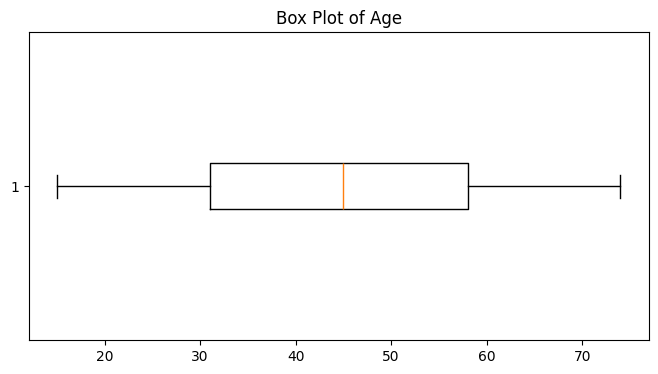

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot of Age')
plt.show()

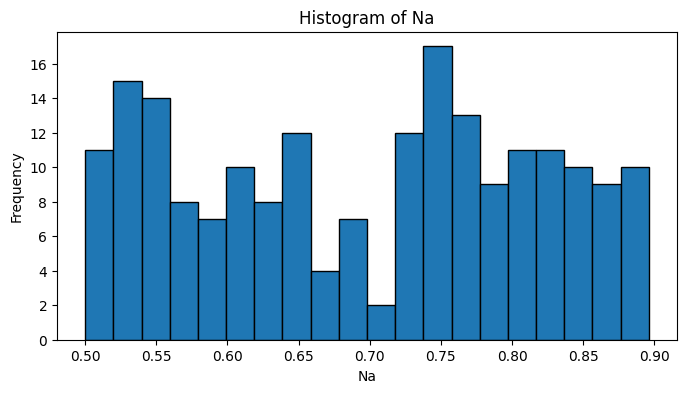

In [9]:
plt.figure(figsize=(8, 4))
plt.hist(df['Na'], bins=20, edgecolor='k')
plt.xlabel('Na')
plt.ylabel('Frequency')
plt.title('Histogram of Na')
plt.show()


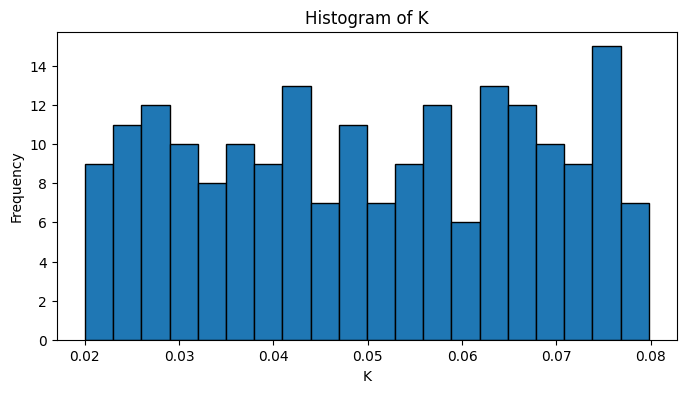

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(df['K'], bins=20, edgecolor='k')
plt.xlabel('K')
plt.ylabel('Frequency')
plt.title('Histogram of K')
plt.show()

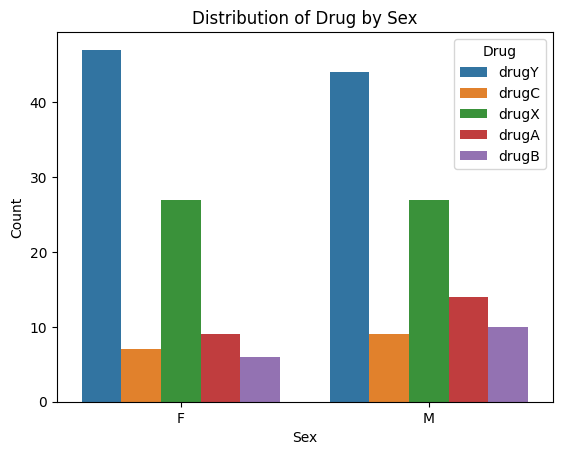

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Drug', data=df)
plt.title('Distribution of Drug by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

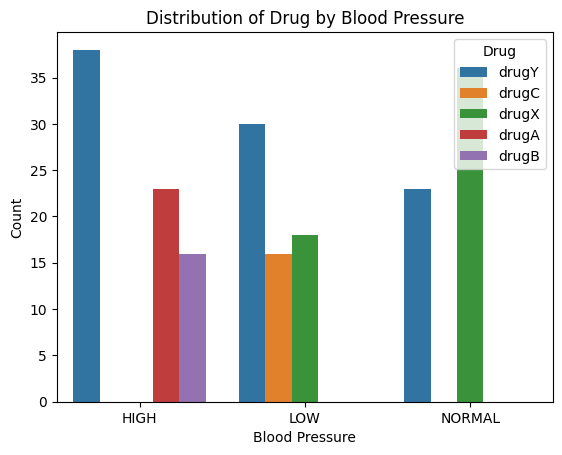

In [12]:
sns.countplot(x='BP', hue='Drug', data=df)
plt.title('Distribution of Drug by Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

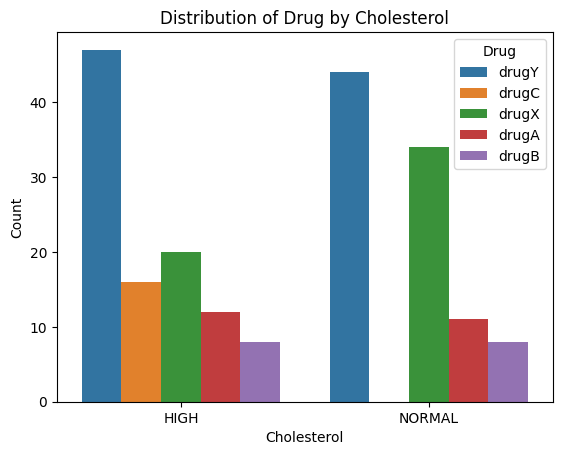

In [13]:

sns.countplot(x='Cholesterol', hue='Drug', data=df)
plt.title('Distribution of Drug by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

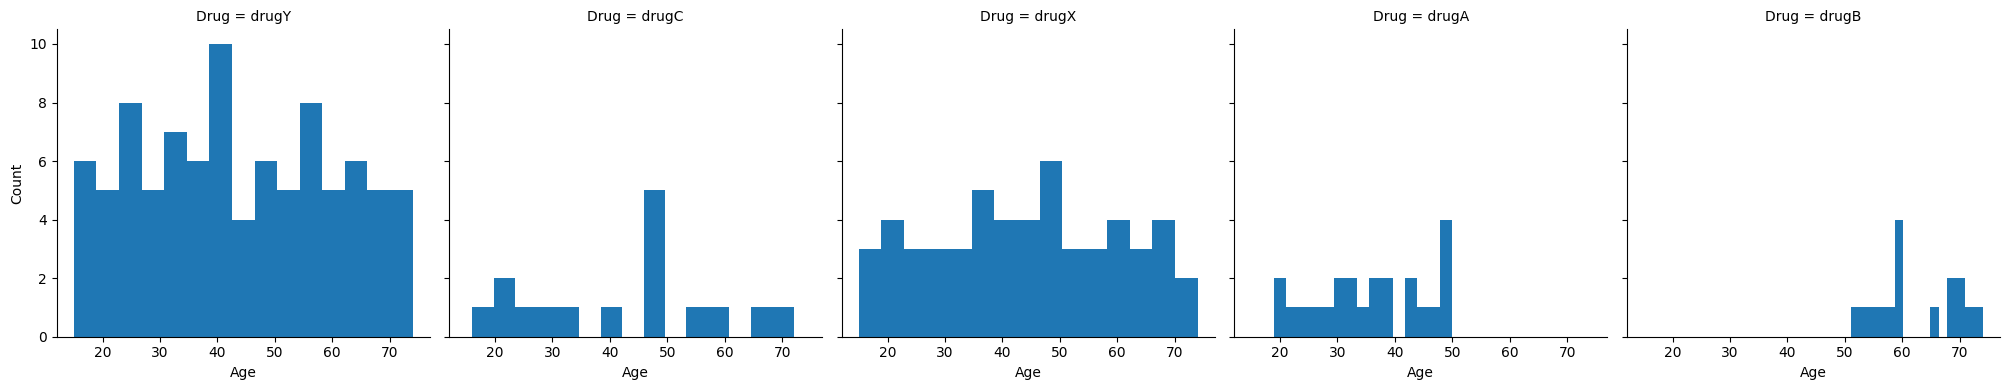

In [14]:
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'Age', bins=15)
g.set_axis_labels('Age', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()



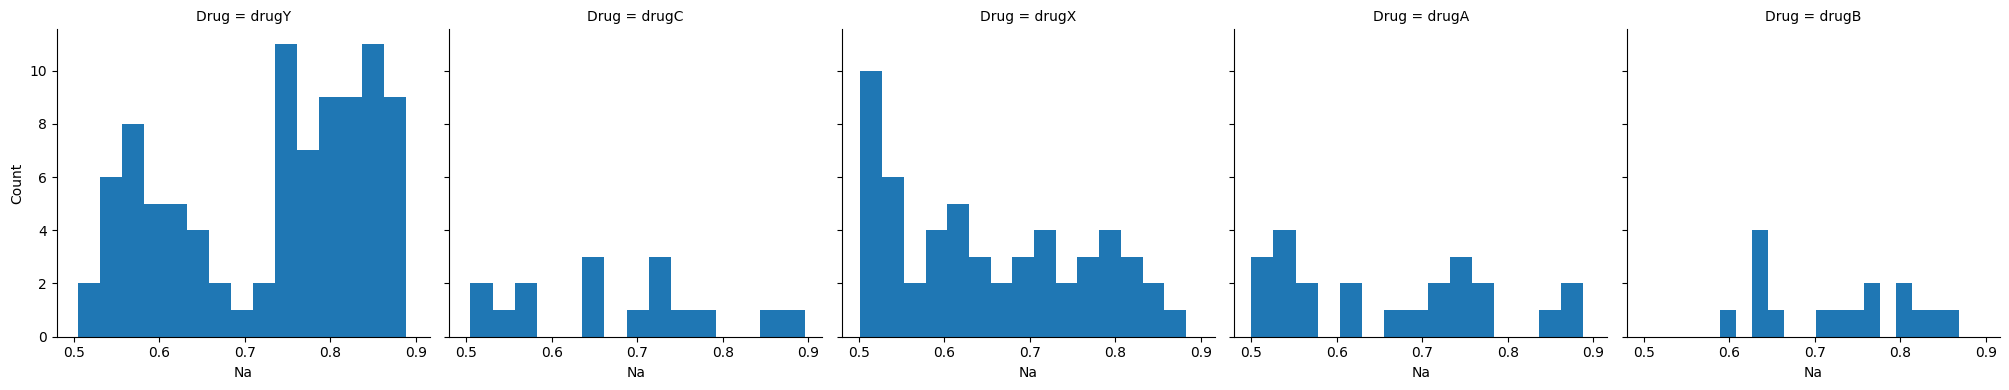

In [15]:
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'Na', bins=15)
g.set_axis_labels('Na', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()


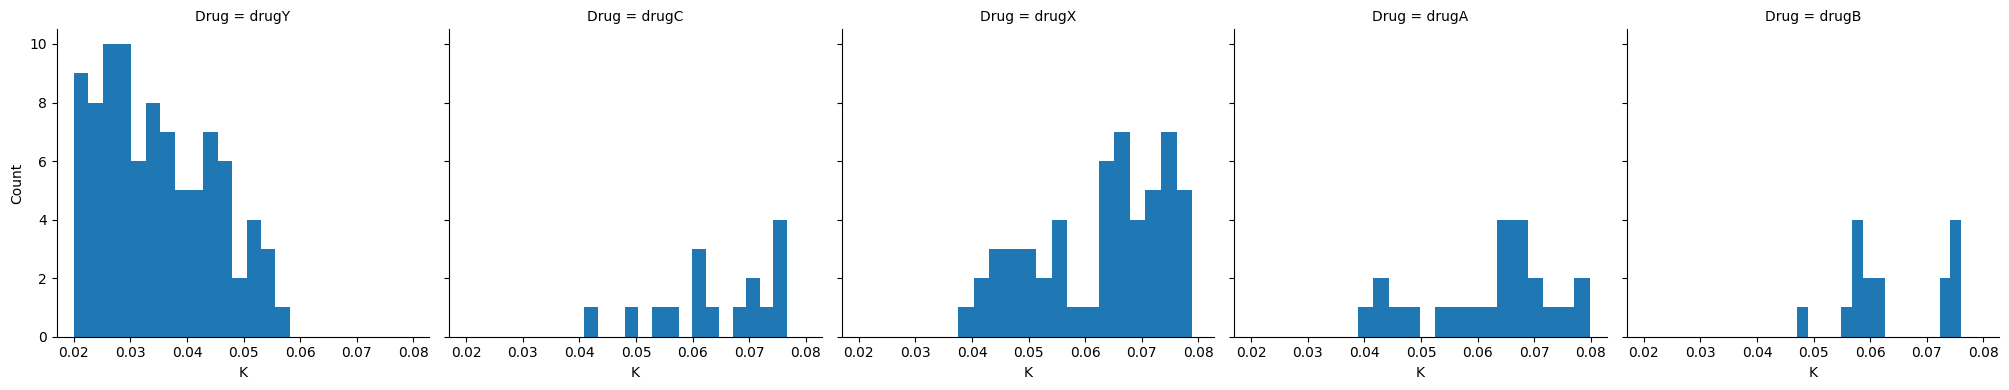

In [16]:

g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'K', bins=15)
g.set_axis_labels('K', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()

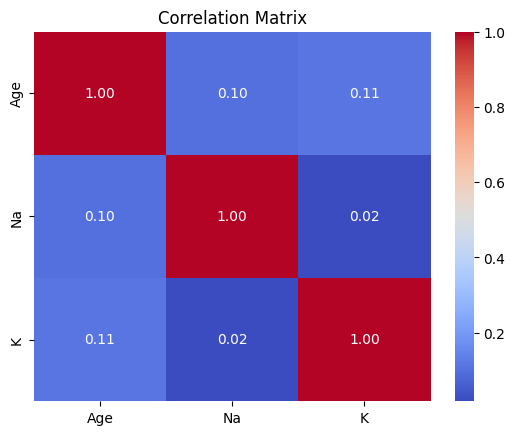

In [17]:
correlation_matrix = df[['Age', 'Na', 'K']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


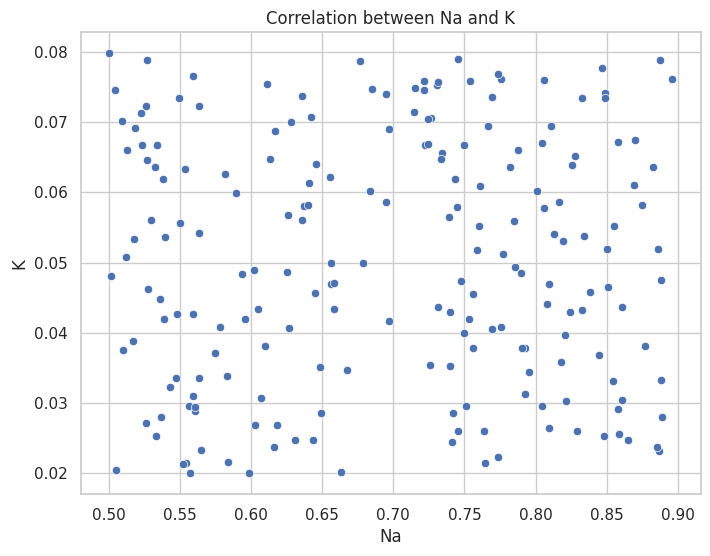

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Na", y="K", data=df)
plt.title("Correlation between Na and K")
plt.xlabel("Na")
plt.ylabel("K")
plt.show()

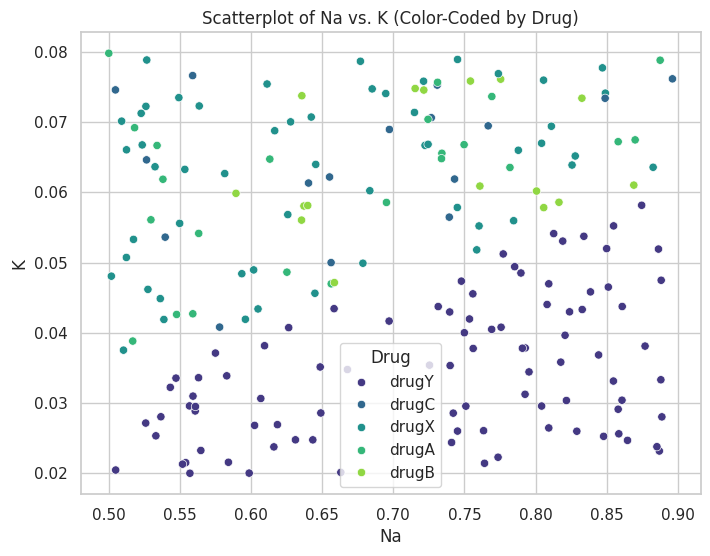

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Na", y="K", hue="Drug", data=df, palette="viridis")

plt.title("Scatterplot of Na vs. K (Color-Coded by Drug)")
plt.xlabel("Na")
plt.ylabel("K")
plt.legend(title="Drug")
plt.show()

In [20]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['Drug'], df['Sex'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
Sex     F   M
Drug         
drugA   9  14
drugB   6  10
drugC   7   9
drugX  27  27
drugY  47  44

Chi-Squared Statistic: 2.119248418109203
Degrees of Freedom: 4
p-value: 0.7138369773987128

Expected Frequencies:
[[11.04 11.96]
 [ 7.68  8.32]
 [ 7.68  8.32]
 [25.92 28.08]
 [43.68 47.32]]


In [21]:
df['Na/K'] = df['Na'] / df['K']
df.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug,Na/K
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY,25.354629
1,47,M,LOW,HIGH,0.739309,0.056468,drugC,13.092530
2,47,M,LOW,HIGH,0.697269,0.068944,drugC,10.113556
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX,7.797618
4,61,F,LOW,HIGH,0.559294,0.030998,drugY,18.042906


In [ ]:
from sklearn.preprocessing import LabelEncoder

sex_mapping = {'F': 0, 'M': 1}
df['Sex_encoded'] = df['Sex'].map(sex_mapping)

bp_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['BP_encoded'] = df['BP'].map(bp_mapping)

cholesterol_mapping = {'NORMAL': 0, 'HIGH': 1}
df['Cholesterol_encoded'] = df['Cholesterol'].map(cholesterol_mapping)

label_encoder = LabelEncoder()
df['Drug_encoded'] = label_encoder.fit_transform(df['Drug'])

df.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug,Na/K,Sex_encoded,BP_encoded,Cholesterol_encoded,Drug_encoded
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY,25.354629,0,2,1,4
1,47,M,LOW,HIGH,0.739309,0.056468,drugC,13.092530,1,0,1,2
2,47,M,LOW,HIGH,0.697269,0.068944,drugC,10.113556,1,0,1,2
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX,7.797618,0,1,1,3
4,61,F,LOW,HIGH,0.559294,0.030998,drugY,18.042906,0,0,1,4


In [23]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Na', 'K', 'Na/K']]
y = df['Drug_encoded'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (100, 7) (100,)
Testing set shape (X, y): (100, 7) (100,)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Age', 'Na/K']] = scaler.fit_transform(X_train[['Age', 'Na/K']])
X_test[['Age', 'Na/K']] = scaler.transform(X_test[['Age', 'Na/K']])

print("Updated Training Data:")
print(X_train.head())

Updated Training Data:
          Age  Sex_encoded  BP_encoded  Cholesterol_encoded        Na  \
4    0.921032            0           0                    1  0.559294   
32   0.213453            1           0                    0  0.625889   
142  0.862067            1           2                    0  0.635762   
145  0.921032            1           1                    1  0.745123   
109 -1.319635            1           1                    1  0.543355   

            K      Na/K  
4    0.030998  0.299149  
32   0.056828 -0.762623  
142  0.073744 -1.124022  
145  0.078906 -0.999862  
109  0.032247  0.118925  


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz
from sklearn import tree

features_to_use = ['Age', 'BP_encoded', 'Cholesterol_encoded', 'Na/K']

X_train_subset = X_train[features_to_use]

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_subset, y_train)

tree_rules = export_text(clf, feature_names=features_to_use)
print("Decision Tree Model Rules:")
print(tree_rules)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_to_use, class_names=sorted(df['Drug'].unique()), filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("decision_tree.pdf") 
graph.view("decision_tree.pdf")    

Decision Tree Model Rules:
|--- Na/K <= -0.19
|   |--- BP_encoded <= 1.50
|   |   |--- BP_encoded <= 0.50
|   |   |   |--- Cholesterol_encoded <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- Cholesterol_encoded >  0.50
|   |   |   |   |--- class: 2
|   |   |--- BP_encoded >  0.50
|   |   |   |--- class: 3
|   |--- BP_encoded >  1.50
|   |   |--- Age <= 0.30
|   |   |   |--- class: 0
|   |   |--- Age >  0.30
|   |   |   |--- class: 1
|--- Na/K >  -0.19
|   |--- class: 4



ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = clf.predict(X_train_subset)
y_pred_test = clf.predict(X_test[features_to_use])

accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train, target_names=df['Drug'].unique())


accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test, target_names=df['Drug'].unique())

print("Evaluation Metrics for Training Dataset:")
print(f"Accuracy: {accuracy_train:.2f}")
print("Confusion Matrix:")
print(conf_matrix_train)
print("Classification Report:")
print(classification_report_train)

print("\nEvaluation Metrics for Testing Dataset:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Classification Report:")
print(classification_report_test)

Evaluation Metrics for Training Dataset:
Accuracy: 1.00
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00         9
       drugA       1.00      1.00      1.00        27
       drugB       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Evaluation Metrics for Testing Dataset:
Accuracy: 1.00
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 42]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00        16
       drugC       1.00   

In [33]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train_subset, y_train)

y_train_pred_lr = logistic_reg.predict(X_train_subset)
y_test_pred_lr = logistic_reg.predict(X_test[features_to_use])

accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)
classification_report_train_lr = classification_report(y_train, y_train_pred_lr, target_names=df['Drug'].unique())

accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)
classification_report_test_lr = classification_report(y_test, y_test_pred_lr, target_names=df['Drug'].unique())

print("Evaluation Metrics for Logistic Regression on Training Dataset:")
print(f"Accuracy: {accuracy_train_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_train_lr)
print("Classification Report:")
print(classification_report_train_lr)


print("\nEvaluation Metrics for Logistic Regression on Testing Dataset:")
print(f"Accuracy: {accuracy_test_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_test_lr)
print("Classification Report:")
print(classification_report_test_lr)

Evaluation Metrics for Logistic Regression on Training Dataset:
Accuracy: 0.94
Confusion Matrix:
[[ 6  0  0  0  1]
 [ 0  8  0  0  0]
 [ 0  0  8  1  0]
 [ 0  0  0 23  4]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      0.86      0.92         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      0.89      0.94         9
       drugA       0.96      0.85      0.90        27
       drugB       0.91      1.00      0.95        49

    accuracy                           0.94       100
   macro avg       0.97      0.92      0.94       100
weighted avg       0.94      0.94      0.94       100


Evaluation Metrics for Logistic Regression on Testing Dataset:
Accuracy: 0.98
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 26  1]
 [ 0  1  0  0 41]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00 

In [35]:
coefficients = logistic_reg.coef_

intercept = logistic_reg.intercept_

print("Logistic Regression Coefficients:")
for feature, coef in zip(features_to_use, coefficients[0]):
    print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {intercept[0]:.4f}")

Logistic Regression Coefficients:
Age: -0.5560
Intercept: -2.6875
BP_encoded: 1.7093
Intercept: -2.6875
Cholesterol_encoded: -0.1963
Intercept: -2.6875
Na/K: -0.9617
Intercept: -2.6875
